In [11]:
#Importing Libraries

In [12]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [13]:
#Extract Filenames from Folder

In [14]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [15]:
len(filenames)

44390

In [16]:
#Importing ResNet50 Model and Cofiguration

In [17]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [18]:
#Extracting Fetaures from Image

In [19]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


array([0.        , 0.00295302, 0.        , ..., 0.00752506, 0.02113524,
       0.0040174 ], dtype=float32)

In [20]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [21]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([0.0068408 , 0.03663965, 0.0123835 , ..., 0.0126484 , 0.        ,
       0.02691425], dtype=float32)

In [22]:
image_features = []
for file in filenames[0:2000]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

[array([0.0068408 , 0.03663965, 0.0123835 , ..., 0.0126484 , 0.        ,
        0.02691425], dtype=float32),
 array([0.00243906, 0.00502102, 0.        , ..., 0.00899796, 0.010141  ,
        0.02011692], dtype=float32),
 array([0.00300274, 0.02201002, 0.00272649, ..., 0.01291527, 0.01619332,
        0.03272966], dtype=float32),
 array([0.        , 0.00604671, 0.03079083, ..., 0.00867087, 0.01381306,
        0.0020539 ], dtype=float32),
 array([0.        , 0.02514593, 0.00750099, ..., 0.01606759, 0.02194844,
        0.02754991], dtype=float32),
 array([6.8147870e-04, 9.0113143e-03, 9.9171375e-05, ..., 9.8304674e-03,
        1.3181512e-02, 2.0324741e-02], dtype=float32),
 array([0.        , 0.03170027, 0.00250635, ..., 0.00525804, 0.00400831,
        0.02631919], dtype=float32),
 array([0.00047159, 0.0307015 , 0.00586006, ..., 0.        , 0.00372594,
        0.04489094], dtype=float32),
 array([0.00332701, 0.00109601, 0.01224259, ..., 0.00382173, 0.05124391,
        0.02726531], dtype=fl

In [23]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [24]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [25]:
#Loading Pickle Files

In [26]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [27]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [28]:
np.array(Image_features).shape

(2000, 2048)

In [29]:
#Finidng Simialar Images

In [30]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [31]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [32]:
input_image = extract_features_from_images('16871.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [33]:
distance,indices = neighbors.kneighbors([input_image])

In [34]:
indices[0]

array([ 133,  682,   30, 1340,  431,  847])

In [35]:
from IPython.display import Image

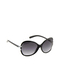

In [36]:
Image('16871.jpg')

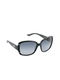

In [37]:
Image(filenames[indices[0][1]])

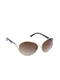

In [38]:
Image(filenames[indices[0][2]])

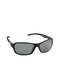

In [39]:
Image(filenames[indices[0][3]])

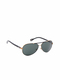

In [40]:
Image(filenames[indices[0][4]])

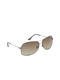

In [41]:
Image(filenames[indices[0][5]])